## 2. Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

### 2.2 Data preperation

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [4]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [5]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    

In [6]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

### 2.3 Exploratory Data Analysis

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


Distribution of Price

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

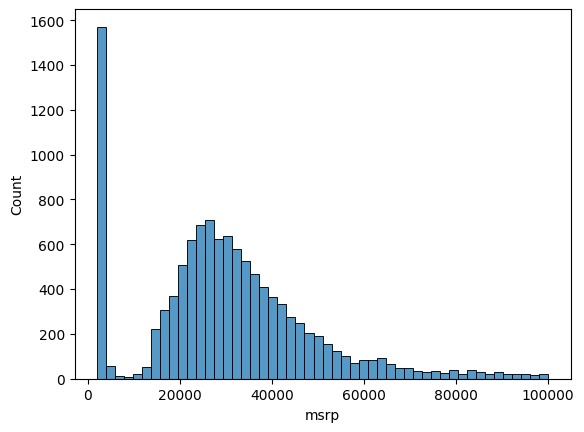

In [9]:
sns.histplot(df[df.msrp < 100_000].msrp, bins=50)

In [10]:
np.log1p([1, 10, 1000, 100_000])

array([ 0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [11]:
price_logs = np.log1p(df.msrp)

c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

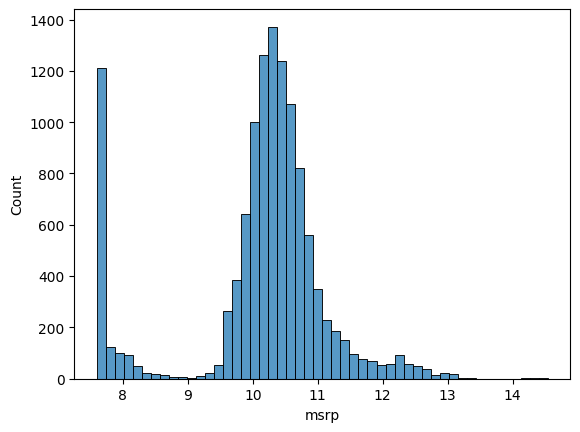

In [12]:
sns.histplot(price_logs, bins=50)

Missing Values

In [13]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### 2.4 Setting up Validation Framework

In [14]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [15]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [16]:
#get shuffled validated test 
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val :]]

In [17]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [18]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)


In [21]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

### 2.5 Linear Regression

In [22]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [23]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]

def linear_reg(xi, w, w0):
    n = len(xi)    

    pred = w0 

    for j in range(n):
        pred = pred + w[j]  * xi[j]
    # applies coefficient
    return pred

In [24]:
np.expm1(linear_reg(xi, w, w0)) 

222347.2221101062

### 2.6 Linear Regression Vector Form

In [25]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j]  * w[j]

    return res

In [26]:
w_new = [w0] + w

In [27]:
def linear_reg(xi, w):
# applies coefficient
    xi = [1] + xi
    return dot(xi, w)

In [28]:
linear_reg(xi,w_new)

12.312

In [29]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 24, 2031]
x3 = [1, 453, 24, 86]

X = [x1, x2, x3]
X = np.array(X)

In [30]:
X.dot(w_new)

array([12.38 , 13.512, 12.832])

### 2.7 Training a linear Regression Model

In [31]:
def train_linear_regression(X, y):
    pass

In [32]:
X = np.array([[148, 24, 1385],
 [132, 24, 2031],
 [453, 24, 86],
 [1128, 12, 1385],
 [1313, 26, 2031],
 [436, 27, 999],
 [185, 14, 1241],
 [158, 23, 5632],
 [4522, 25, 856]])

X = np.column_stack([np.ones(X.shape[0]), X])

y = [100,200,250,150,120,231,256,342,124]
X.shape, len(y)

((9, 4), 9)

In [33]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [34]:
w_full[0]

195.87000997662815

In [35]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])

    X = np.column_stack([np.ones(X.shape[0]), X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]
    

### 2.8 Car Price Baseline Model

In [36]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [37]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

In [38]:
w0, w = train_linear_regression(X_train, y_train)

In [39]:
y_pred = w0 + X_train.dot(w)

c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Axes: ylabel='Count'>

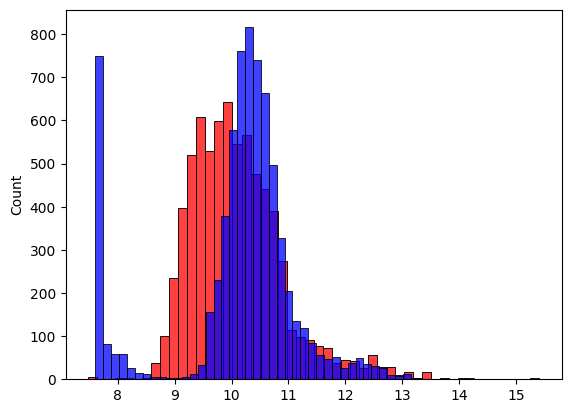

In [40]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_train, color = 'blue', bins=50)

### 2.9 RMSE

In [41]:
def rmse(y, y_pred):
    error = y - y_pred 
    se = error  ** 2
    mse = se.mean()

    return np.sqrt(mse)

In [42]:
rmse(y_train, y_pred)

0.7554192603920132

### 2.10 Validating the Model

In [43]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    
    features = base + ['age']
    df_num = df[features]

    df_num = df_num.fillna(0)
    X = df_num.values



    return X

In [44]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058299

### Simple Feature Engineering

In [45]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058299

c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\khanm375\Documents\ml_zoom\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Axes: ylabel='Count'>

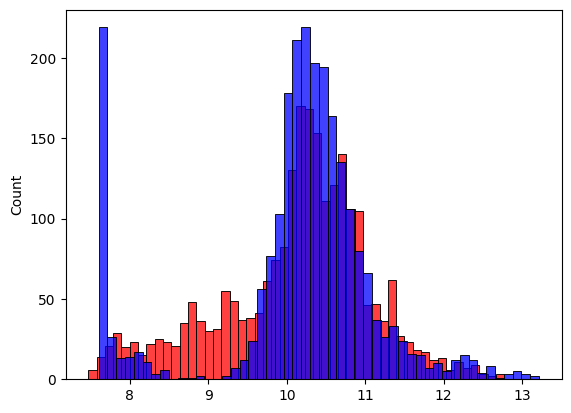

In [46]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_val, color = 'blue', bins=50)

### 2.13 Categorical Variables

In [48]:
for v in [2,3,4]:
    df_train[f'num_doors_{v}'] = (df_train.number_of_doors == v).astype('int')
    

In [53]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df_train.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    
    df_num = df[features]

    df_num = df_num.fillna(0)
    X = df_num.values



    return X

In [54]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [55]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5186588617185612

In [60]:
#Make variable
df.make.nunique()
makes = list(df.make.value_counts().head().index)

In [62]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    for make in makes:
        df[f"make_{make}"] = (df.make == make).astype('int')
        features.append(f"make_{make}")
    
    df_num = df[features]

    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [63]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849556795

In [66]:
categories = [
    'make',
    'engine_fuel_type',
    'transmission_type',
    'driven_wheels',
    'market_category',
    'vehicle_size',
    'vehicle_style'
]

cat_dict = {}

for c in categories:
    cat_dict[c] = list(df[c].value_counts().head().index)

In [68]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    for c, values in cat_dict.items():
        for v in values:
            df[f"{c}_{v}"] = (df[c] == v).astype('int')
            features.append(f"{c}_{v}")
    
    df_num = df[features]

    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [69]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

25.89554529986256

### 2.13 Regularization

In [70]:
def train_linear_regression_reg(X,y, r=0.001):
    ones = np.ones(X.shape[0])

    X = np.column_stack([np.ones(X.shape[0]), X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]
    

In [71]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.45811273182399737

### 2.14 Tuning the Model

In [74]:
for r in [0.0, 0.000001, 0.00001, 0.001, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(f"{r} parameter rmse: {score}")


0.0 parameter rmse: 25.89554529986256
1e-06 parameter rmse: 0.45810945488429705
1e-05 parameter rmse: 0.4581093351621464
0.001 parameter rmse: 0.4581096696783707
1 parameter rmse: 0.45877526896052534
10 parameter rmse: 0.4744097895239128


In [76]:
r = 0.01 
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
print(f"{r} parameter rmse: {score}")

0.01 parameter rmse: 0.45811273182399737


### 2.15 Using the Model

In [77]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)


In [78]:
X_full_train = prepare_X(df_full_train)

In [80]:
y_full_train = np.concatenate([y_train, y_val])

In [81]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [82]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
print(f"{r} parameter rmse: {score}")

0.01 parameter rmse: 0.4542190339950456


In [83]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [84]:
df_small = pd.DataFrame([car])

In [85]:
X_small = prepare_X(df_small)

In [86]:
y_pred = w0 + X_small.dot(w)
y_pred

array([10.43527596])

In [87]:
np.expm1(y_pred)

array([34038.4680463])

In [89]:
np.expm1(y_test[20])

35000.00000000001